# BT3041 - Analysis and Interpretation of Biological Data

## Submitted by Sahana G (BE17B038)

### Question 1

#### Implement Multilayer Perceptron for classifying the given MNIST dataset. The given dataset contains 800 training data and 200 testing data. Train the network and plot the loss and accuracy of the training and testing datasets.

In [1]:
#Loading all necessary libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining a class MLP, so that an instance of this class will be our model based on the input parameters.
class MLP():
    
    #Initializing function that sets the following variables
        #inputSize = 784, which is 28*28 pixels.
        #hiddenSize = 100, 100 hidden layers in the model
        #outputSize = 10, {0,1,2,...9}
    def initialize(self, inputSize = 784, hiddenSize = 100, outputSize = 10):
        self.inputSize = inputSize
        self.hiddenSize = hiddenSize
        self.outputSize = outputSize
        self.train_loss = []
        self.train_accuracies = []
        self.test_loss = []
        self.test_accuracies = []
    
    #Activation function of the hidden layer neurons is sigmoid function
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    
    #Activation function of the output layer neurons is the softmax function 
    #that assigns each class from {0..9} a specific probability based on the confidence
    def softmax(self,x):
        return np.exp(x)/np.sum(np.exp(x))
    
    #Random weights are set initially.
    def setRandomWeights(self):
        #the weight matrix will be of size [currentLayerSize, previousLayerSize].
        self.weight1 = np.random.randn(self.hiddenSize,self.inputSize) #for hidden layer
        self.weight2 = np.random.randn(self.outputSize,self.hiddenSize) #for output layer
    
    # the size of the bias matrix depends on the current layer size.
    def setBias(self):
        self.bias1 = np.zeros([self.hiddenSize]) #for hidden layer
        self.bias2 = np.zeros([self.outputSize]) #for output layer
        
    #Training the dataset. This function takes in the following inputs -
        #X_train - training images
        #Y_train - training labels
        #X_test - testing images - for calculating the test loss and accuracy
        #Y_test - testing labels - for calculating the test loss and accuracy
        #learningRate - hyperparameter - set as 0.001
        #epochs - hyperparameter - the number of iterations we train the training dataset - set as 500
        
    #Note - we are not training on the test data, i.e., the test data is not used for updating weights and biases
    
    def train(self, X_train, Y_train, X_test, Y_test, learningRate, epochs):
        self.learningRate = learningRate
        self.epochs = epochs
        self.X_train = X_train
        self.Y_train = Y_train
    
        for i in range(epochs):
            #In each iteration of epoch...
            
            for j in range(len(X_train)):
                #Every data point is taken as x
                #y is the output label, with the expected probability as 1 for the corresponding training label from Y_train.
                x = np.array(X_train[j])
                y = np.zeros([self.outputSize])
                y[Y_train[j]] = 1
        
                #Forward pass
            
                #First hidden layer
                inj1 = np.dot(self.weight1,x) + self.bias1 #x*W1 +b1
                aj1 = self.sigmoid(inj1) #sigmoid(x*W1 +b1) - activation function for hidden layer
                
                #Output layer
                inj2 = np.dot(self.weight2,aj1)+self.bias2 #x*W2 +b2
                aj2 = self.softmax(inj2) #softmax(x*W1 +b1) - activation function for output layer
                
                #Backward pass
                #Propogate error backward and compute gradients
                #Since the loss function used is Cross-entropy loss, derivative reduces to (prediction - expected)
                
                d_aj2 = aj2 - y #Calculate derivative of loss at output layer
                d_weight2 = np.dot(d_aj2.reshape((self.outputSize,1)), aj1.reshape((self.hiddenSize,1)).T) #gradient of weight coming into output layer
                d_bias2 = d_aj2 #gradient of bias coming into output layer
    
                d_aj1 = np.multiply(np.matmul(self.weight2.T, d_aj2.reshape((self.outputSize,1))) , aj1.reshape((self.hiddenSize,1))) #hidden layer
                d_weight1 = np.dot(d_aj1, x.reshape((self.inputSize,1)).T) #gradient of weight coming into hidden layer
                d_bias1 = d_aj1 #gradient of bias coming into hidden layer
                
                #Update weights and biases based on calculated gradients
                self.bias1 -= learningRate * d_bias1.reshape(-1)
                self.bias2 -= learningRate * d_bias2.reshape(-1)
                self.weight1 -= learningRate * d_weight1
                self.weight2 -= learningRate * d_weight2
              
            # Train (Accuracy & Loss) vs Epoch
            # predict function is called. This function returns the predictions based on the model and the overall cross-entropy loss
            predictions, loss_train = self.predict(X_train)
            correct_predictions = 0
            for j in range(len(Y_train)):
                if Y_train[j] == predictions[j]:
                    correct_predictions += 1 #the total number of correct predictions based on comparison with Y_train
            train_accuracy = float(correct_predictions)/float(len(Y_train)) #Accuracy of the training data in that epoch is calculated
            
            self.train_loss.append(loss_train/len(X_train)) #Overall training loss at the epoch is appended to a list
            self.train_accuracies.append(train_accuracy) #training accuracy at the epoch is appended to a list
            
            #Test (Accuracy & Loss) vs Epoch
            # Accuracy and Loss are calculated based on the updated weights that were only dependent on training data.
            # The test data was not trained on.
            # predict function is called. This function returns the predictions based on the model and the overall cross-entropy loss
            predictions, loss_test = classifier.predict(X_test)
            correct_predictions = 0
            for k in range(len(Y_test)):
                if Y_test[k] == predictions[k]:
                    correct_predictions += 1 #the total number of correct predictions based on comparison with Y_test
            test_accuracy = float(correct_predictions)/float(len(Y_test)) #Accuracy of the test data in that epoch is calculated
            
            self.test_accuracies.append(test_accuracy) #Overall test-data loss at that epoch is appended to a list
            self.test_loss.append(loss_test/len(X_test)) #testing accuracy at that epoch is appended to a list
            
            print("Epoch:", i, "Loss:", loss_train/len(X_train), "Training Accuracy:", train_accuracy)
    
    # Predicting the labels for the given training images. This function is called inside the train function above. 
    def predict(self, X_test):
        predictions = [] #The predictions are appended to this list
        loss = 0 # The loss is a summation of log of result of activation function for output layer - 
                 # softmax function that assigns probabilities for each label.
        
        for x in X_test: 
            
            inj1 = np.dot(self.weight1,x) + self.bias1 #x*W1 +b1
            aj1 = self.sigmoid(inj1) #sigmoid(x*W1 +b1)
            inj2 = np.dot(self.weight2,aj1)+self.bias2 #x*W2 +b2
            aj2 = self.softmax(inj2) #softmax(x*W2 +b2)
            
            prediction = np.argmax(aj2) #the predicted label is the one with maximum probability from softmax function
            loss -= np.log(np.max(aj2)) #cross entropy loss is calculated
            
            predictions.append(prediction)
        return predictions, loss

In [3]:
#Loading the data file 
file = open('D:\Textbook-Sem6\AIBD\Assignment\dataset\mnist_data.pkl', 'rb')
data = pickle.load(file)
file.close

X_train = data['trainImages']
Y_train = data['trainLabels']
X_test = data['testImages']
Y_test = data['testLabels']

In [4]:
#Classifier is an instance of the class MLP. This object acts as our model 
classifier = MLP()
#We initialise the network architechture of the MLP
classifier.initialize(inputSize = 784, hiddenSize = 100, outputSize = 10)
#We set random weights in our model - based on layer sizes
classifier.setRandomWeights()
#We set initial biases in out model - based on layer sizes
classifier.setBias()
#We train the MLP model at a rate of 0.001 for 500 epochs
classifier.train(X_train = X_train, Y_train = Y_train, X_test = X_test, Y_test = Y_test, learningRate = 0.001, epochs = 500)

Epoch: 0 Loss: 0.6351658734227956 Training Accuracy: 0.66125
Epoch: 1 Loss: 0.5883422100601401 Training Accuracy: 0.6825
Epoch: 2 Loss: 0.5188621583544808 Training Accuracy: 0.73625
Epoch: 3 Loss: 0.4308465224684324 Training Accuracy: 0.7825
Epoch: 4 Loss: 0.45960077366643376 Training Accuracy: 0.7475
Epoch: 5 Loss: 0.4672544538297901 Training Accuracy: 0.75625
Epoch: 6 Loss: 0.41563975932366093 Training Accuracy: 0.7325
Epoch: 7 Loss: 0.3962720342039185 Training Accuracy: 0.7625
Epoch: 8 Loss: 0.38336396771085773 Training Accuracy: 0.7425
Epoch: 9 Loss: 0.3755173126161067 Training Accuracy: 0.7675
Epoch: 10 Loss: 0.35345276196821124 Training Accuracy: 0.77375
Epoch: 11 Loss: 0.35452749394290806 Training Accuracy: 0.79
Epoch: 12 Loss: 0.3648160957727551 Training Accuracy: 0.80625
Epoch: 13 Loss: 0.3452062339411783 Training Accuracy: 0.805
Epoch: 14 Loss: 0.3500717992417839 Training Accuracy: 0.8175
Epoch: 15 Loss: 0.3351389096335965 Training Accuracy: 0.81375
Epoch: 16 Loss: 0.33540680

In [6]:
# Final Training Accuracy
predictions, loss = classifier.predict(X_train)
correct_predictions = 0
for i in range(len(Y_train)):
    if Y_train[i] == predictions[i]:
        correct_predictions += 1
train_accuracy = float(correct_predictions)/float(len(Y_train))
train_loss = loss/len(X_train)
print("Train-data Accuracy: ",train_accuracy, " Loss: ", train_loss)

Train-data Accuracy:  0.9  Loss:  0.1654431469294719


In [7]:
# Test Accuracy
predictions, loss = classifier.predict(X_test)
correct_predictions = 0
for i in range(len(Y_test)):
    if Y_test[i] == predictions[i]:
        correct_predictions += 1
test_accuracy = float(correct_predictions)/float(len(Y_test))
test_loss = loss/len(X_test)
print("Test-data Accuracy: ",test_accuracy, " Loss: ", test_loss)

Test-data Accuracy:  0.75  Loss:  0.19994511050731906


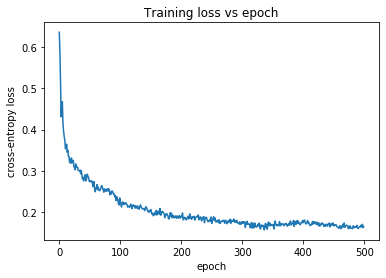

In [8]:
# Training Loss vs Epoch Plot
plt.plot(classifier.train_loss)
plt.title('Training loss vs epoch')
plt.ylabel('cross-entropy loss')
plt.xlabel('epoch')
plt.show()

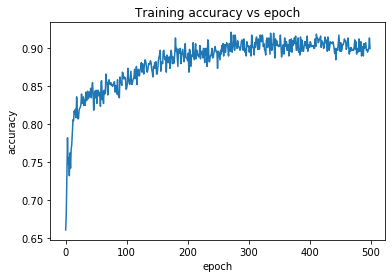

In [9]:
# Training Accuracy vs Epoch Plot
plt.plot(classifier.train_accuracies)
plt.title('Training accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

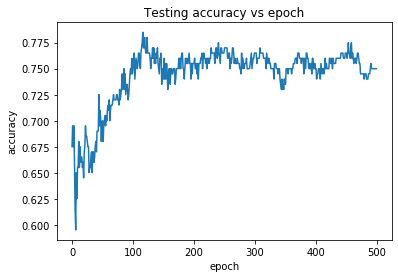

In [10]:
# Testing Accuracy vs Epoch Plot
plt.plot(classifier.test_accuracies)
plt.title('Testing accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

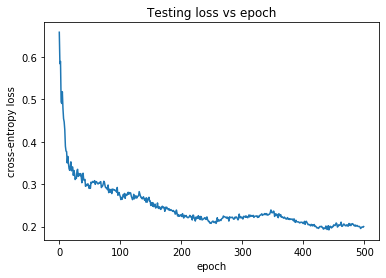

In [11]:
# Testing Loss vs Epoch Plot
plt.plot(classifier.test_loss)
plt.title('Testing loss vs epoch')
plt.ylabel('cross-entropy loss')
plt.xlabel('epoch')
plt.show()

### Question 2

#### Implement the DBSCAN algorithm to cluster the given 2000 data points. Report the right parameters to get four clusters and plot the clusters.

In [12]:
def Clustering(D, identity, P, P_neighbours, C, eps, MinPts):
#Clustering function grows a cluster `C` from the seed point `P`
#This function iterates through all data points and identifies all points that belong to 'C'

#Input -
#   D - data points as a numpy array
#   identity - cluster number corresponding to each data point.
#   P - index of the seed data point for cluster C
#   P_neighbours - All the neighouring data points within eps range of P
#   C - identity of this cluster
#   eps - minimum threshold for neighbourhood
#   MinPts - minumum number of points within the eps neighbours for a 
#            data point to be recognised as core point.
    
    #assign identity as C to point P
    identity[P] = C
    
    i = 0 #index of the data point through iteration
    while i < len(P_neighbours):    
        
        Pn = P_neighbours[i]
        
        #If the point's identity is 0, it has not been claimed yet.
        #And since it is in the neighbourhood, this data point Pn also belongs to cluster C
        if identity[Pn] == 0:
            identity[Pn] = C
            
            #Identify the neighbour points of Pn and if they satisfy the threshold condition,
            #add them as neighbours so that they can be claimed in the same cluster.
            Pn_neighbours = neighbourhood(D, Pn, eps)
 
            if len(Pn_neighbours) >= MinPts:
                P_neighbours = P_neighbours + Pn_neighbours
        
        i += 1 #increment the index.

In [13]:
def neighbourhood(D, P, eps):
#Finds the neighbourhood points of P, with a threshold distance of eps.

#Input -
#   D - data points as a numpy array
#   P - index of the seed data point for cluster C
#   eps - minimum threshold for neighbourhood
#Output -
#   neighbors - a list of all neighbouring points to a given seed point.

    neighbors = [] 

    for Pn in range(0, len(D)):
        if np.linalg.norm(D[P] - D[Pn]) < eps: #Calculates the eucledian distance between the two points.
            neighbors.append(Pn)
        
    return neighbors

In [14]:
def DBSCAN(D, eps, MinPts):
#This function takes in the dataset with eps and minpts as parameters and returns the identity, i.e, 
#what cluster each data point belongs to.

#Input -
#   D - data points as a numpy array
#   eps - minimum threshold for neighbourhood
#   MinPts - minumum number of points within the eps neighbours for a 
#            data point to be recognised as core point.
#Output -
#   identity - cluster number corresponding to each data point.

    identity = [0]*len(D)
    C = 0 #tracks the number of clusters

    for i in range(0, len(D)):
        
        #if data point [i]'s identity is not 0, then continue to the next point.
        if not (identity[i] == 0):
            continue
        
        #Find the data points within eps neighbourhood to data point [i]
        i_neighbours = neighbourhood(D, i, eps)
        
        #if there are less than MinPts in the neighbourhood, assign it as a non-core point.
        #this can be later clustered as noise or border point.
        
        if len(i_neighbours) < MinPts:
            identity[i] = -1
        else: 
            #if there are atleast MinPts in the neighbourhood of data point[i], use it as a seed point for a new cluster.
            C += 1
            
            Clustering(D, identity, i, i_neighbours, C, eps, MinPts)
            
    #All points are clustered. Return the identity of each data point.
    return identity

Text(0.5, 1.0, 'DBSCAN Clustering')

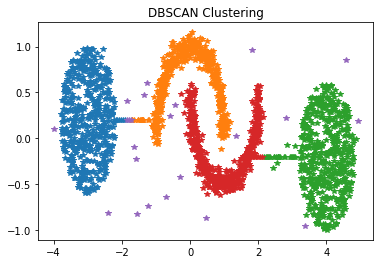

In [15]:
#Load the data file
file = open('D:\Textbook-Sem6\AIBD\Assignment\dataset\dbscan2000.pkl', 'rb')
D = pickle.load(file)
file.close

#Call the function 
identity = DBSCAN(D, 0.19, 10)

#The total number of clusters including noise = maximum value in identity
max_cluster = max(identity)

#A list of all identities of the data points - [-1,1,2,3,4]
total_clusters = list(set(identity))

#A dictionary to hold the data points that belong to each cluster.
cluster_points = {}

#A list to hold the data points that are classified as noise.
noise = []

#In an iterative loop, assign data points to the dictionary cluster_points.
for i in total_clusters:
    data_i = []
    if i!= -1:
        for j in range(len(D)):
            if identity[j]==i:
                data_i.append(list(D[j]))
        cluster_points[i]= (data_i)

for i in range(len(D)):
    if identity[i]== -1:
        noise.append(list(D[i]))
        
cluster_points[-1] = noise 

#Plotting the points; a new color is automatically assigned to each clusters.
plt.figure()
for i in cluster_points:
    #Segregate the X-points and Y-points
    x = []
    y = []
    for j in range(len(cluster_points[i])):
        x.append(cluster_points[i][j][0])
        y.append(cluster_points[i][j][1])
    plt.plot(x,y,'*')
plt.title('DBSCAN Clustering')